In [1]:
import astrometry_tools as at
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

def mad(x):
    return scs.median_absolute_deviation(x)

Loads catalogs that contain pre-computed catalogs for astrometric errors based on the comparison of HST and HSC catalogs to Gaia catalogs.

In [2]:
    
cat_HST = np.loadtxt('HST_astrometric_errors.csv', dtype = str, delimiter = ',')[1:,:].astype(float)

cat_HSC = np.loadtxt('HSC_astrometric_errors.csv', dtype = str, delimiter = ',')[1:,:].astype(float)

Functions to validate the interpolation scheme used to recover the astrometric error where there are no stars.

In [3]:
def test_interp(frac, repeat, cat, N_star, method):
    N = np.size(cat_HST[:,0])
    errors = []
    truth = []
    for i in range(repeat):
        ind = np.sort((np.random.rand(int(N/frac))*(N-1)).astype(int))

        test = cat_HST[ind,:]
        truth_cat = np.delete(cat_HST, ind, axis = 0)
        truth.append(test)
        errors.append(at.get_error(test[:,0:2], truth_cat, 
                      N_star = N_star, method = method))
    return np.array(errors), np.array(truth)

def get_error_on_error(errors, truth):
    Ra_diff = (errors[:,:,0].flatten()-truth[:,:,-2].flatten())
    Dec_diff = (errors[:,:,1].flatten()-truth[:,:,-1].flatten())
    r = np.abs(Ra_diff/truth[:,:,-2].flatten())
    d = np.abs(Dec_diff/truth[:,:,-1].flatten())
    return np.mean(r[np.isnan(r) == False]), mad(r[np.isnan(r) == False]), np.mean(d[np.isnan(d) == False]), mad(d[np.isnan(d) == False])



Plots the interpolated error at star locations that have been removed from the HST catalog as a function of method and number of point used. The interpolated errors are estimated by selecting a hundredth of the stars in the catalog, removing them form the list of known errors and trying to recover their values.

nearest
linear
cubic


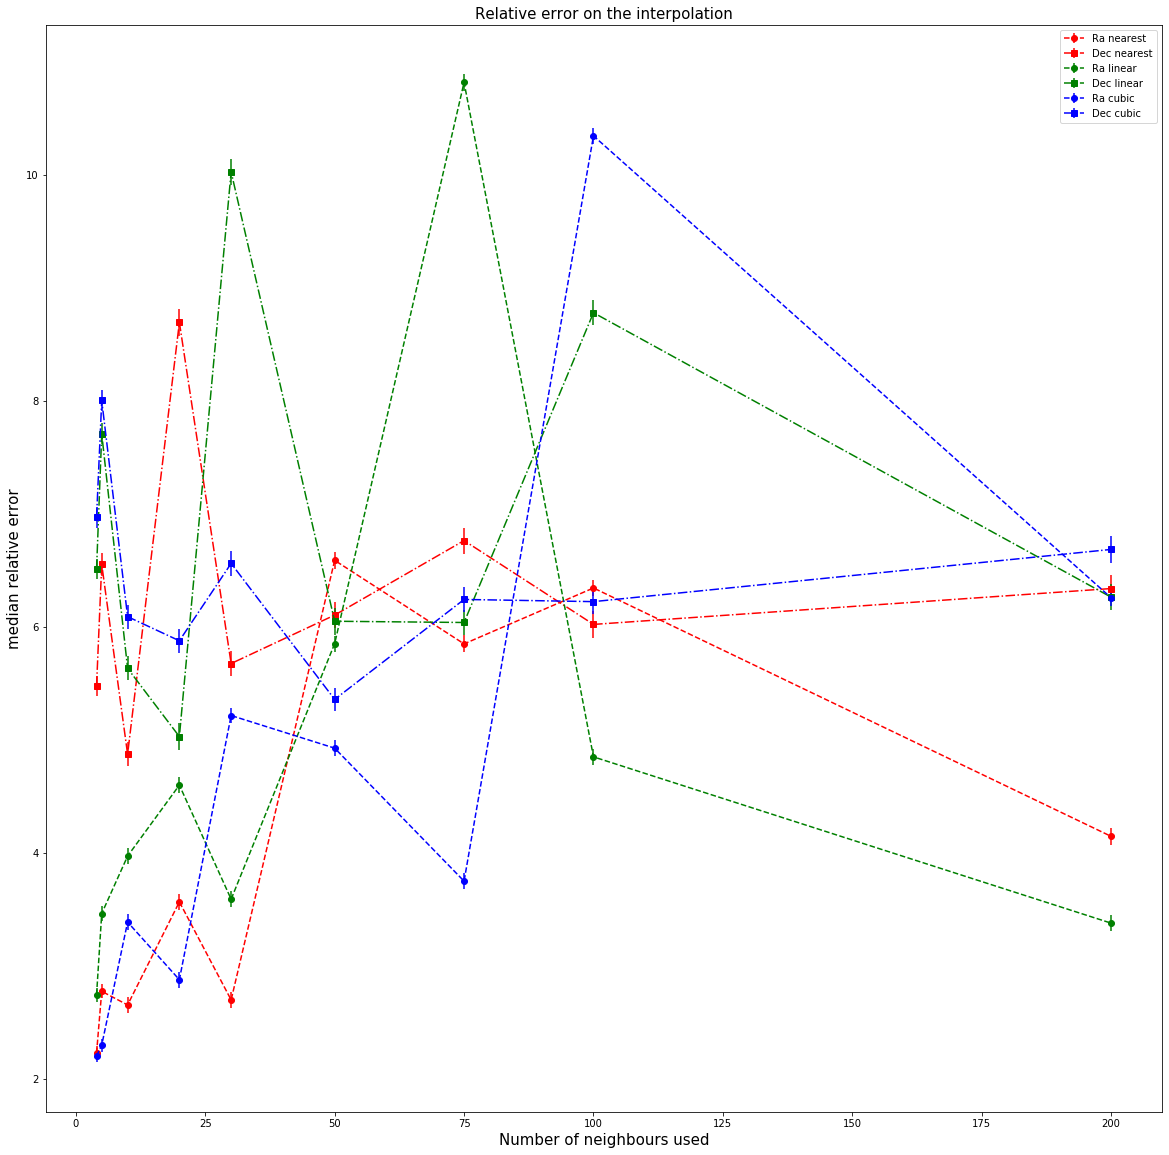

In [4]:
methods = ['nearest', 'linear', 'cubic']
colours = ['r','g','b']
Ns = [4,5, 10, 20, 30, 50, 75, 100, 200]
count = 0
plt.figure(figsize = (20,20))
plt.title('Relative error on the interpolation', fontsize = 15)
for m in methods:
    means_r = []
    sigmas_r = []
    means_d = []
    sigmas_d = []
    print(m)
    for n in Ns:
        e_r, t_ru = test_interp(100,100,cat_HST, n,m)
        mr_e, sr_e, md_e, sd_e = get_error_on_error(e_r, t_ru)
        means_r.append(mr_e)
        sigmas_r.append(sr_e)
        means_d.append(md_e)
        sigmas_d.append(sd_e)
    plt.errorbar(np.array(Ns), np.array(means_r), yerr = np.array(sigmas_r)., label = 'Ra '+ m, fmt = 'o--'+colours[count])
    plt.errorbar(np.array(Ns), np.array(means_d), yerr = np.array(sigmas_d)., label = 'Dec ' + m, fmt = 's-.'+colours[count])
    count+=1
plt.xlabel('Number of neighbours used', fontsize = 15)
plt.ylabel('median relative error', fontsize = 15)
plt.legend()
plt.show()

Interpolated errors at star positions versus actual errors as per the catalog. 

(3.284323899569642, 0.7430285035061435, 7.693793547477747, 1.1256021582892404)


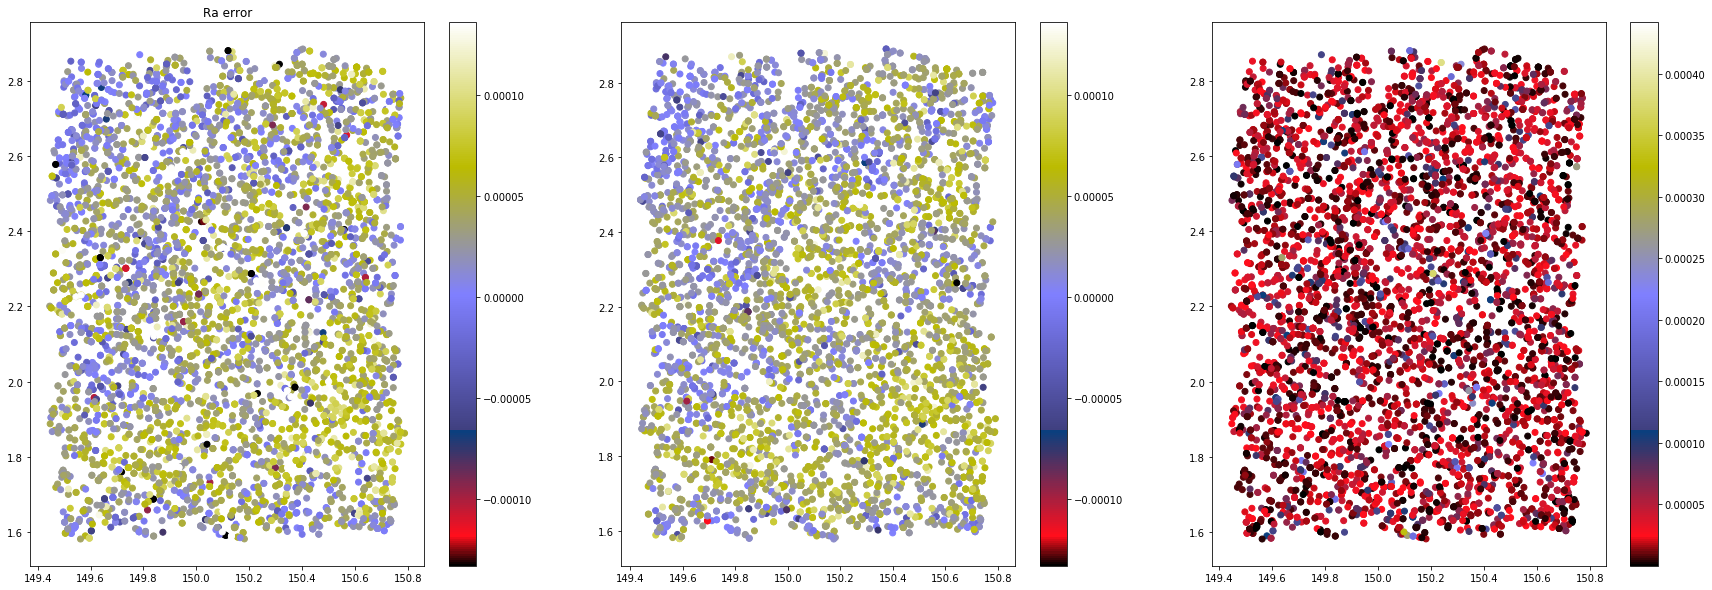

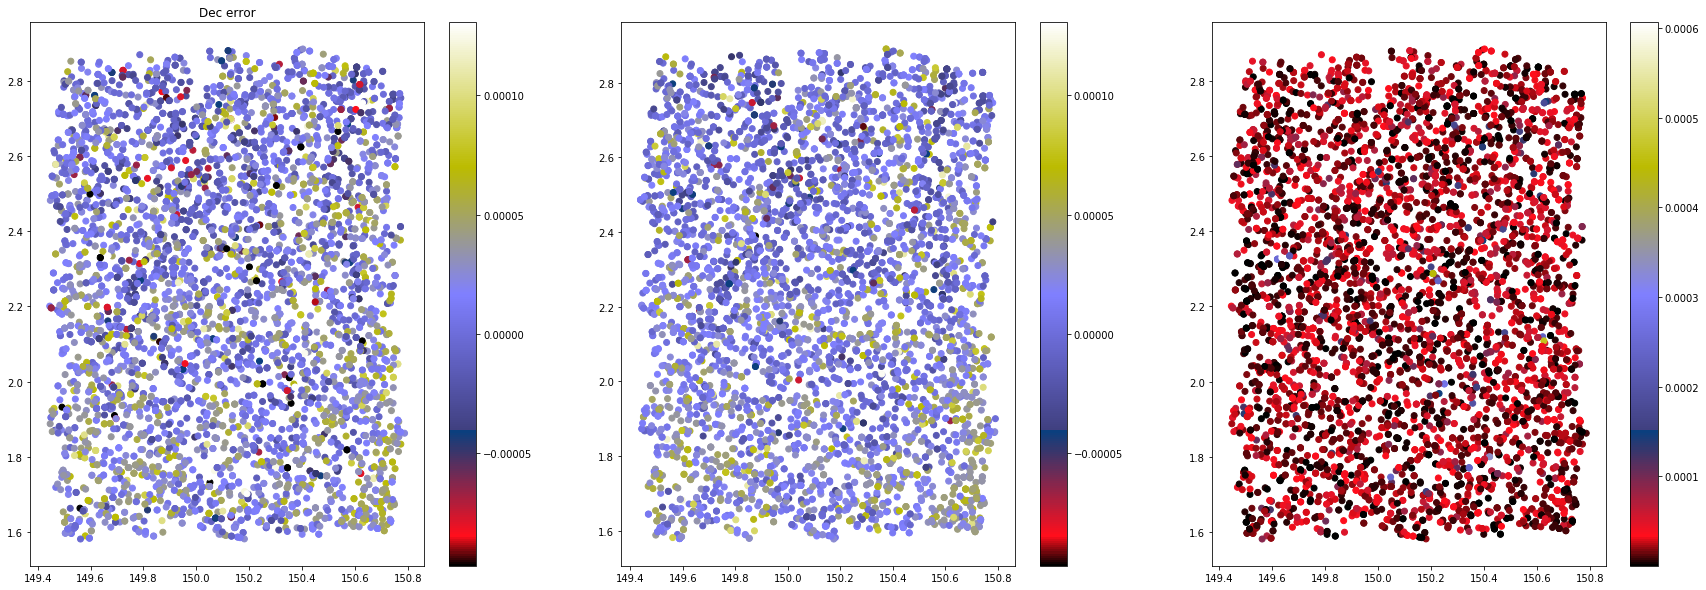

In [9]:
err, true = test_interp(100,100,cat_HST, 100,'cubic')
err = np.array(err)[:,:,:,0]

print(get_error_on_error(err, true))
plt.figure(figsize = (30,10))
plt.subplot(131)
plt.title('Ra error')
plt.scatter(true[:,:,0].flatten(), true[:,:,1].flatten(), 
            c = err[:,:,0].flatten(), cmap='gist_stern', vmin = np.min(true[:,:,-2]), vmax = np.max(true[:,:,-2]))
plt.colorbar()
plt.subplot(132)
plt.scatter(true[:,:,0].flatten(), true[:,:,1].flatten(), 
            c = true[:,:,-2].flatten(), cmap='gist_stern')
plt.colorbar()
plt.subplot(133)
plt.scatter(true[:,:,0].flatten(), true[:,:,1].flatten(), 
            c = np.abs(true[:,:,-2].flatten()-err[:,:,0].flatten()), cmap='gist_stern')
plt.colorbar()
plt.show()


plt.figure(figsize = (30,10))
plt.subplot(131)
plt.title('Dec error')
plt.scatter(true[:,:,0].flatten(), true[:,:,1].flatten(), 
            c = (err[:,:,1]).flatten(), cmap='gist_stern', vmin = np.min(true[:,:,-1]), vmax = np.max(true[:,:,-1]))
plt.colorbar()
plt.subplot(132)
plt.scatter(true[:,:,0].flatten(), true[:,:,1].flatten(), 
            c = true[:,:,-1].flatten(), cmap='gist_stern')
plt.colorbar()
plt.subplot(133)
plt.scatter(true[:,:,0].flatten(), true[:,:,1].flatten(), 
            c = np.abs(true[:,:,-1].flatten()-err[:,:,1].flatten()), cmap='gist_stern')
plt.colorbar()
plt.show()

Example of getting the error at a given position in the sky

In [6]:
print('error HST', at.get_error(np.array([150.33064694, 2.06965889]), cat_HST, 
                  N_star = 40, method = 'nearest'))
print('error HSC', at.get_error(np.array([150.33064694, 2.06965889]), cat_HSC, 
                  N_star = 40, method = 'nearest'))

error HST (array([2.22364861e-05]), array([7.9102005e-06]))
error HSC (array([2.49868145e-06]), array([1.25988294e-06]))
